In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

### Make data

In [2]:
numcat = 2
categories = ['healthy', 'disease']

In [3]:
df_h = pd.read_csv('health_data.csv')
print(df_h.head())

train_per = 0.7 #train test split
#randomize indces, take the first 80% of the indeces and last 20 percent as test
indices = np.random.permutation(df_h.shape[0])
train_ind, test_ind = indices[:int(train_per*df_h.shape[0])], indices[int(train_per*df_h.shape[0]):]
# print(len(train_ind), len(test_ind))

#select the data corresponding to the train and test indices and save into 2 dataframes. Reset index afterwards
train_df, test_df = df_h.loc[train_ind, :], df_h.loc[test_ind, :]
train_df, test_df = train_df.reset_index(drop = True), test_df.reset_index(drop = True)
# train_df.drop('index')

# Data in numpy arrays (also separating train data by classes)
X_train = train_df.drop('category', axis = 1).to_numpy()
y_train = train_df.drop(['age', 'restbps', 'chol'], axis = 1).to_numpy().reshape((X_train.shape[0],))

# X_train_0, X_train_1 = train_df.loc[train_df['category'] == 0].drop('category', axis = 1).to_numpy(),train_df.loc[train_df['category'] == 1].drop('category', axis = 1).to_numpy()
X_test, y_test = test_df.drop('category', axis = 1).to_numpy(), test_df['category'].to_numpy().reshape((-1, ))
print(X_test.shape, y_test.shape, X_train.shape, y_train.shape)

   age  restbps  chol  category
0   26      109   243         0
1   27      106   156         0
2   28      107   225         0
3   27      105   277         0
4   30       96   221         0
(211, 3) (211,) (489, 3) (489,)


In [ ]:
#Normalize the data

### RBF Kernel

In [16]:
#Training
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
#testing
y_pred_test = clf.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.8603    0.9070    0.8830       129
           1     0.8400    0.7683    0.8025        82

    accuracy                         0.8531       211
   macro avg     0.8501    0.8376    0.8428       211
weighted avg     0.8524    0.8531    0.8517       211



### Grid search over C and gamma

In [ ]:
rangeC = 
range_g = 
for C in rangec:
    for gamma in range_g:
        

### Linear Kernel

In [19]:
#Training
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
#testing
y_pred_test = clf.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.8788    0.8992    0.8889       129
           1     0.8354    0.8049    0.8199        82

    accuracy                         0.8626       211
   macro avg     0.8571    0.8521    0.8544       211
weighted avg     0.8619    0.8626    0.8621       211



### Cross Validation
To find optimal value of C 

In [47]:
error = []
rangeC = [1, 5, 10, 30, 50]
for C in rangeC:
    cv_stats = cross_validate(svm.SVC(kernel='linear', C=C), X_train, y_train, cv = 5)
    error.append(1-cv_stats['test_score'].mean())

[0.15331369661266547, 0.15331369661266547, 0.15535451293919633, 0.15331369661266547, 0.15331369661266547]


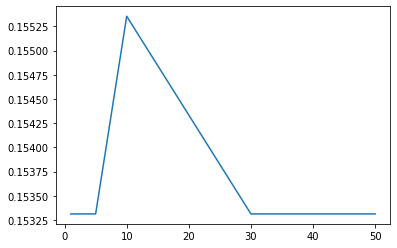

In [49]:
print(error)
plt.plot(rangeC, error)

### Polynomial Kernel

### Degree 2

In [51]:
#Training
clf = svm.SVC(kernel='poly', degree = 2, C = 10)
clf.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
#testing
y_pred_test = clf.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.8788    0.8992    0.8889       129
           1     0.8354    0.8049    0.8199        82

    accuracy                         0.8626       211
   macro avg     0.8571    0.8521    0.8544       211
weighted avg     0.8619    0.8626    0.8621       211



### Cross Validation
To find optimal value of C 

In [55]:
error = []
rangeC = [1, 5, 10, 30, 50]
for C in rangeC:
    cv_stats = cross_validate(svm.SVC(kernel='poly', degree = 2, C=C), X_train, y_train, cv = 5)
    error.append(1-cv_stats['test_score'].mean())

[0.14515043130654315, 0.15129391962970762, 0.14717020828950145, 0.15535451293919633, 0.15535451293919633]


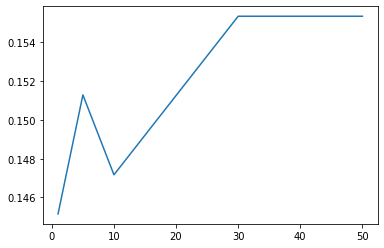

In [56]:
print(error)
plt.plot(rangeC, error)

### Degree 3

In [57]:
#Training
clf = svm.SVC(kernel='poly', degree = 3, C = 10)
clf.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
#testing
y_pred_test = clf.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.8788    0.8992    0.8889       129
           1     0.8354    0.8049    0.8199        82

    accuracy                         0.8626       211
   macro avg     0.8571    0.8521    0.8544       211
weighted avg     0.8619    0.8626    0.8621       211



### Cross Validation
To find optimal value of C 

In [60]:
error = []
rangeC = [1, 5, 10, 30, 50]
for C in rangeC:
    cv_stats = cross_validate(svm.SVC(kernel='poly', degree = 3, C=C), X_train, y_train, cv = 5)
    error.append(1-cv_stats['test_score'].mean())

[0.14923206395960453, 0.15535451293919633, 0.15741636860929942, 0.15739532926572686, 0.15741636860929942]


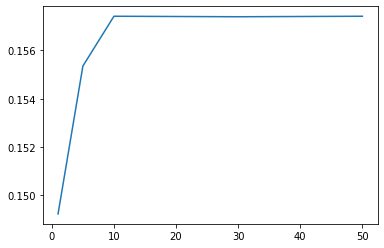

In [61]:
print(error)
plt.plot(rangeC, error)

### Degree 4

In [62]:
#Training
clf = svm.SVC(kernel='poly', degree = 4, C = 10)
clf.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
#testing
y_pred_test = clf.predict(X_test)

In [64]:
print(classification_report(y_test, y_pred_test, digits = 4))

              precision    recall  f1-score   support

           0     0.8788    0.8992    0.8889       129
           1     0.8354    0.8049    0.8199        82

    accuracy                         0.8626       211
   macro avg     0.8571    0.8521    0.8544       211
weighted avg     0.8619    0.8626    0.8621       211



### Cross Validation
To find optimal value of C 

In [65]:
error = []
rangeC = [1, 5, 10, 30, 50]
for C in rangeC:
    cv_stats = cross_validate(svm.SVC(kernel='poly', degree = 4, C=C), X_train, y_train, cv = 5)
    error.append(1-cv_stats['test_score'].mean())

[0.16147696191878824, 0.15739532926572686, 0.15741636860929942, 0.15333473595623803, 0.15129391962970762]


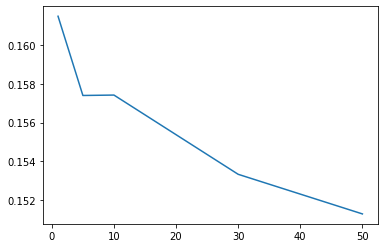

In [66]:
print(error)
plt.plot(rangeC, error)